In [19]:
import json
import os
import glob
import re
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
Mazarinade_path = "Corpus-main/Mazarinades"  
Mazarinade_path_json = "Corpus-main/Mazarinades_jsons/"


## 1er étape : annotation des vers et proses - coexistance dans un seul text (test1-100)
- read(), c‘est pas un bon méthode de lire les fichiers xml parce que les balises (les annotations) vont perturber l'analyse de texte

In [3]:
def lire_xml(chemin_fichier):
    Nf=0
    type = {}
    type.setdefault("vers",[])
    type.setdefault("prose",[])
    for fichier in glob.glob(chemin_fichier+"/*.xml"):
        Nf+=1
        with open(fichier, 'r') as f:
            f = f.read()
            #ProseVers = re.search('<term type="form">vers</term>', f)
            fichierNom = fichier.split('/')[-1].split('_')[0]
            if re.search('<term type="form">vers</term>', f):
                type["vers"].append(fichierNom)
                #print(fichierNom)
            if re.search('<term type="form">prose</term>', f):
                type["prose"].append(fichierNom)
    return type, Nf


In [4]:
test100, Nfichier=lire_xml("Corpus-main/Mazarinades/1-100")
print("Nb des Textes dans le dossier 1-100: ", Nfichier)
print("Nb des Textes contiennent le Vers : ", len(test100["vers"]))
print("Nb des Textes contiennent le Prose : ", len(test100["prose"]))
print("Textes contiennent le Vers et la Prose en même temps : ", set(test100["vers"]).intersection(set(test100["prose"])))

Nb des Textes dans le dossier 1-100:  64
Nb des Textes contiennent le Vers :  24
Nb des Textes contiennent le Prose :  44
Textes contiennent le Vers et la Prose en même temps :  {'Moreau19', 'Moreau17', 'Moreau3', 'Moreau90'}


## 2ère étape : aller voir le corpus, xml et json
### parser l'arbre de XML et lire Json - comparer les deux méthodes
-  Moreau3860 n'existe pas dans le dossier de XML

```<term type="form">prose</term> <term type="form">manifeste</term> ```

In [201]:
def trouver_structure_xml(fichier_chemin):
    NfichiersTotal=0
    NT=0
    results = {}
    results.setdefault("vers",[])
    results.setdefault("prose",[])
    for file_path in glob.glob(fichier_chemin+"/*"):
        NT+=1 # compter les dossiers des textes
        for fichier in glob.glob(file_path+"/*.xml"):
            # compter les fichiers des textes
            NfichiersTotal+=1
            with open(fichier, 'r') as f:
                soup = BeautifulSoup(f, "xml")

                # n'utiliser que les chemins relatifs des fichiers sans extension 
                fichierNom = fichier.split('/')[-2]+"/"+fichier.split('/')[-1].split('.')[0]
                # structure du fichier xml
                terms = [noeud.text for noeud in soup.teiHeader.profileDesc.textClass.keywords.find_all('term', type='form')]
                 #[<term type="form">vers</term>, <term type="form">prose</term>]
                if 'vers' in terms:
                    results['vers'].append(fichierNom)
                if 'prose' in terms:
                    results['prose'].append(fichierNom)
    return  results, NfichiersTotal

In [202]:
corpusTotal, NfichierTotal = trouver_structure_xml(Mazarinade_path) 
# parser en arbre prend du temps, 48 secondes sur mon PC 

In [203]:
print("Nb des Textes dans le dossier Mazarinades : ", NfichierTotal)
print("Types des textes : ", corpusTotal.keys())
print("Nb des Textes - Vers : ",len(corpusTotal["vers"]))
print("Nb des Textes - Proses : ",len(corpusTotal["prose"]))
print("Nb des Textes contenant le Vers et la Prose en même temps : ", len(set(corpusTotal["vers"]).intersection(set(corpusTotal["prose"]))))
#print("Proportion des textes en Vers : ", len(corpusTotal["vers"])/NfichierTotal)

Nb des Textes dans le dossier Mazarinades :  3064
Types des textes :  dict_keys(['vers', 'prose'])
Nb des Textes - Vers :  727
Nb des Textes - Proses :  2467
Nb des Textes contenant le Vers et la Prose en même temps :  130


In [11]:
def lire_json(chemin_fichier):
    Nf =  0
    Nd = 0
    
    type = {}
    type.setdefault("vers",[])
    type.setdefault("prose",[])
    type.setdefault("mix",[])

    for dossier in glob.glob(chemin_fichier+"/*"):
        Nd+=1
        for fichier in glob.glob(dossier+"/*.json"):
            
            with open(fichier, 'r') as f:
                f = json.load(f)
                forms = f['entête']["form"]
                Nf+=1
                fichierNom = fichier.split('/')[-2]+"/"+fichier.split('/')[-1].split('.')[0]
                """if 'vers' in forms:
                        type["vers"].append(fichierNom)
                if 'prose' in forms:
                         type["prose"].append(fichierNom)""" 
                if forms == "vers":
                    type["vers"].append(fichierNom)
                elif forms == "prose":
                    type["prose"].append(fichierNom)
                elif forms == ["vers","prose"] or forms == ["prose","vers"]:
                    type["mix"].append(fichierNom)
                else: 
                    print(fichierNom, forms)
    return type, Nf


In [12]:
Mazarinade_json_path = "Corpus-main/Mazarinades_jsons"  
corpusTotalJson, NfichierTotalJson= lire_json(Mazarinade_json_path) 
print("Nb des Textes json dans le dossier Mazarinades : ", NfichierTotalJson)
print("Types des textes json : ", corpusTotalJson.keys())
print("Nb des Textes json - Vers : ",len(corpusTotalJson["vers"]))#len(corpusTotalJson["vers"]))
print("Nb des Textes json - Proses : ",len(corpusTotalJson["prose"]))
#print("Nb des Textes json contenant le Vers et la Prose en même temps : ", len(set(corpusTotalJson["vers"]).intersection(set(corpusTotalJson["prose"]))))
print("Nb des Textes json contenant le Vers et la Prose en même temps : ", len(corpusTotalJson["mix"]))


3901-4000/Moreau3950_GBOOKS ['prose', 'récit']
2401-2500/Moreau2404_MAZ ['prose', 'manifeste']
Nb des Textes json dans le dossier Mazarinades :  3065
Types des textes json :  dict_keys(['vers', 'prose', 'mix'])
Nb des Textes json - Vers :  598
Nb des Textes json - Proses :  2335
Nb des Textes json contenant le Vers et la Prose en même temps :  130


In [208]:
print("Manque du Texte dans le dossier 'Mazarinades' : ", set(corpusTotalJson["vers"]).difference(set(corpusTotal["vers"])))


Manque du Texte dans le dossier 'Mazarinades' :  {'3801-3900/Moreau3860_GALL'}


        "change": [
            {
                "@status": "corrected",
                "@when": "2022-07-15",
                "@who": "AB"
            },
            {
                "@status": "corrected",
                "@when": "2022-08-04",
                "@who": "MF"
            }
        ],

## Lecture des fichiers json

In [9]:
def lire_json_corrector(chemin_fichier):
    resulC = {}
    resulC.setdefault("C",[])
    resulC.setdefault("NC",[])

    for dossier in glob.glob(chemin_fichier+"/*"):
        for fichier in glob.glob(dossier+"/*.json"):
            with open(fichier, 'r') as f:
                f = json.load(f)
                C =  f["corrector"]
                fichierNom = fichier.split('/')[-2]+"/"+fichier.split('/')[-1].split('.')[0]
                #try:
                    #f['entête']['change']['@status']
                #except:
                    #pass
                    #C =  f['entête']['change'][0]['@status']
                if C :
                     resulC["C"].append(fichierNom)
                else:
                    resulC["NC"].append(fichierNom)
    return resulC
CNC = lire_json_corrector(Mazarinade_json_path)
print("Nb des Textes json - Corrector : ",len(CNC["C"]))
print("Nb des Textes json - Non Corrector : ",len(CNC["NC"]))



Nb des Textes json - Corrector :  87
Nb des Textes json - Non Corrector :  2978


In [ ]:
fichier = "Corpus-main/Mazarinades_jsons/Bibliotheque_Mazarine/BM48896_MAZ.json"
fichierNom = fichier.split('/')[-2]+"/"+fichier.split('/')[-1].split('.')[0]#fichierNom = ("/").join((fichier.split('/')[-2:]))
print(fichierNom)

Bibliotheque_Mazarine/BM48896_MAZ


## 3ème étape : sauvegarder les chemin des vers dans un fichier jason

In [10]:
#def sauvegarder_chemine(dic):

with open("./chemin_vers.txt", "w") as f:
        for i in corpusTotalJson["vers"]:
            f.write(i)
            f.write("\n")
f.close()

## Découverte du corpus de données : échantillon d'un dossier

In [15]:
def lire_json_test(chemin_fichier_test):
    Nf =  0
    sousCorpusVers = {}
    type = {"vers": [], "prose": []}
    anneesDic = {}

    for fichier in glob.glob(chemin_fichier_test+"/*.json"):
            with open(fichier, 'r') as f:
                f = json.load(f)
                forms = f['entête']["form"]
                vers = f['texte']

                if "creation" in  f['entête'].keys() and f['entête']["creation"] != "00-00-0000":
                     annee = f['entête']["creation"][:4]
                else:
                    annee = "inconnu"

                Nf+=1
                fichierNom = fichier.split('/')[-2]+"/"+fichier.split('/')[-1].split('.')[0]

                if annee not in anneesDic:
                    anneesDic[annee] = {"vers": 0, "prose": 0}
                
                if  forms=="vers":   # fichier ne contient que des vers
                    anneesDic[annee]["vers"]+=1
                    type["vers"].append(fichierNom)
                    sousCorpusVers[fichierNom] = vers

                if 'prose' in forms: # fichier contient des prose (et peut-être des vers)
                    anneesDic[annee]["prose"]+=1
                    type["prose"].append(fichierNom)
    
                    
    return type, Nf, sousCorpusVers, anneesDic

In [16]:
Mazarinade_json_path_test = "Corpus-main/Mazarinades_jsons/1-100"  
corpusTotalJson_test, NfichierTotalJson_test, sous_corpus_test,anneeDic_test= lire_json_test(Mazarinade_json_path_test) 
print("Nb des Textes json dans le dossier test : ", NfichierTotalJson_test)
print("Types des textes json : ", corpusTotalJson_test.keys())
print("Nb des Textes json test contiennent les Vers : ",len(corpusTotalJson_test["vers"]))#len(corpusTotalJson["vers"]))
print("Nb des Textes json test contiennent les Proses : ",len(corpusTotalJson_test["prose"]))
print(anneeDic_test)


Nb des Textes json dans le dossier test :  64
Types des textes json :  dict_keys(['vers', 'prose'])
Nb des Textes json test contiennent les Vers :  20
Nb des Textes json test contiennent les Proses :  44
{'1650': {'vers': 4, 'prose': 2}, 'inconnu': {'vers': 7, 'prose': 9}, '1649': {'vers': 7, 'prose': 23}, '1651': {'vers': 0, 'prose': 2}, '1648': {'vers': 2, 'prose': 0}, '1652': {'vers': 0, 'prose': 8}}


### Observation la proportion de documents en vers/prose selon les années (tous les documents)

In [20]:
def merge_dictionaires(original, update):
    for annee, counts in update.items():
        if annee not in original:
            original[annee] = {"vers": 0, "prose": 0}
        original[annee]["vers"]+=(counts.get("vers"))
        original[annee]["prose"]+=(counts.get("prose"))

anneeDic_total = {}

for dossier in glob.glob(Mazarinade_path_json+"/*"):
    _, _, _, anneeDic = lire_json_test(dossier)
    merge_dictionaires(anneeDic_total, anneeDic)

print(anneeDic_total)


{'1649': {'vers': 224, 'prose': 689}, '1652': {'vers': 46, 'prose': 637}, '1651': {'vers': 31, 'prose': 194}, '1650': {'vers': 45, 'prose': 136}, 'inconnu': {'vers': 245, 'prose': 785}, '1648': {'vers': 7, 'prose': 24}, '1654': {'vers': 0, 'prose': 1}, '1656': {'vers': 0, 'prose': 1}}


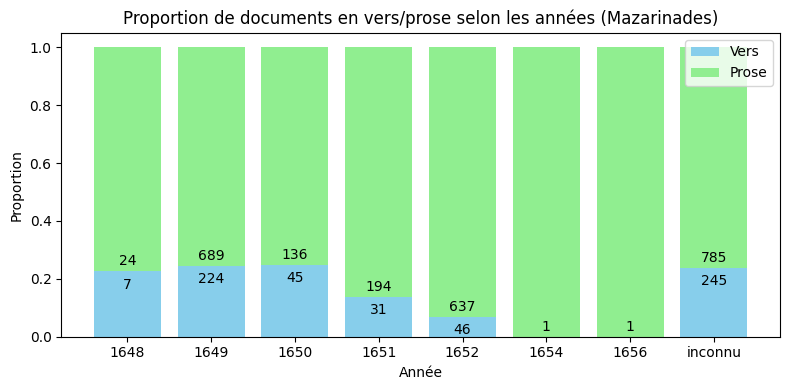

In [21]:
years = []
proportion_vers = []
proportion_prose = []
counts_vers = []
counts_prose = []


for annee, counts in anneeDic_total.items():
    total = counts['vers'] + counts['prose']
    if total > 0: 
        years.append(annee)
        proportion_vers.append(counts['vers'] / total)
        proportion_prose.append(counts['prose'] / total)
        counts_vers.append(counts['vers'])
        counts_prose.append(counts['prose'])


sorted_years_with_inconnu = sorted([year for year in years if year != 'inconnu'], key=lambda x: int(x))
if 'inconnu' in years:
    sorted_years_with_inconnu.append('inconnu')  

sorted_proportion_vers = [proportion_vers[years.index(year)] for year in sorted_years_with_inconnu]
sorted_proportion_prose = [proportion_prose[years.index(year)] for year in sorted_years_with_inconnu]
sorted_counts_vers = [counts_vers[years.index(year)] for year in sorted_years_with_inconnu]
sorted_counts_prose = [counts_prose[years.index(year)] for year in sorted_years_with_inconnu]


plt.figure(figsize=(8, 4))
bars = plt.bar(sorted_years_with_inconnu, sorted_proportion_vers, label='Vers', color='skyblue')
plt.bar(sorted_years_with_inconnu, sorted_proportion_prose, bottom=sorted_proportion_vers, label='Prose', color='lightgreen')


for bar, count_vers, count_prose in zip(bars, sorted_counts_vers, sorted_counts_prose):
    height = bar.get_height()
    if count_vers > 0 and count_prose > 0:
        plt.text(bar.get_x() + bar.get_width() / 2.0, height-0.07, f'{count_vers}', ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() / 2.0, height+0.01, f'{count_prose}', ha='center', va='bottom')

plt.title("Proportion de documents en vers/prose selon les années (Mazarinades)")
plt.xlabel('Année')
plt.ylabel('Proportion')
plt.legend()


plt.tight_layout()
plt.show()


## Chemin d'accès au dossier de données à tester

In [22]:
json_str = json.dumps(sous_corpus_test, ensure_ascii=False, indent=4)
with open('sous_corpus_test.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_str)